# Revisão 
### AF_2020_1 - Ciência dos Dados

___

# Nome: <font color=red>**PARA ESTUDAR**</font>

___
## Índice

- [Questão 1](#q1)
    - [Item a (0,50 ponto)](#q1a)
    - [Item b (1,00 ponto)](#q1b)
    - [Item c (1,00 ponto)](#q1c)
- [Conjunto de dados: Mercado de Peixes](#dataset)
  * [Questão 2](#q2)
    - [Item a (1,00 ponto)](#q2a)
    - [Item b (1,00 ponto)](#q2b)
    - [Item c (0,50 ponto)](#q2c)
  * [Questão 3](#q3)
    - [Item a (0,75 ponto)](#q3a)
    - [Item b (1,00 ponto)](#q3b)
    - [Item c (2,00 ponto)](#q3c)
    - [Item d (0,75 ponto)](#q3d)
    - [Item e (0,50 ponto)](#q3e)
  


___
Carregando algumas bibliotecas:

In [50]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np
import os
import random

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Fernando\Documents\Insper\2 semestre\Ciência dos Dados\Extra\CD20-2\Provas Anteriores\CD2020_S1_AF_Revisão


<div id="q1"></div>

___

## Questão 1 - 2,5 pontos

<img src="./grocery.jpg" width=33% alt="Fonte: https://live.staticflickr.com/3290/2808759067_30eed726d9_o.jpg"> </img>

Uma empresa de transporte de alimentos está interessada em modelar o peso das entregas para realizar estimativas de custo. O peso de uma entrega pode ser separado em duas componentes: o peso de uma caixa de madeira e o peso dos alimentos. Após alguns estudos concluiu-se que o peso da caixa de madeira ($M$) e o peso de **cada** alimento ($A$) podem ser modelados pelas seguintes distribuições (valores em quilogramas):

- $M\sim Normal(10, 0.5^2)$, ou seja, $\mu=10$ e $\sigma=0.5$;
- $A\sim Uniforme(40, 60)$, ou seja, $a=40$ e $b=60$.

Admitindo que os pesos dos alimentos e das caixas são independentes, responda as perguntas a seguir:

<div id="q1a"></div>

**a) [0,5 PONTO]** Qual é a probabilidade do peso de uma caixa de madeira exceder 11 kg?

In [8]:
1 - stats.norm.cdf(11, loc=10, scale=0.5)

0.02275013194817921

<div id="q1b"></div>

**b) [1,0 PONTO]** Qual é a esperança e variância do peso de uma caixa contendo três alimentos iguais?

In [17]:
# 3*A + M
esperanca = 3*stats.uniform.mean(loc=40, scale=60-40) + 10
variancia = 9*(stats.uniform.var(loc=40, scale=60-40)) + 0.5**2
print(f"Esperança = {esperanca}")
print(f"Variância = {variancia}")

Esperança = 160.0
Variância = 300.24999999999994


<div id="q1c"></div>

**c) [1,0 PONTO]** Se amostrarmos 100 alimentos aleatoriamente, qual é a probabilidade da média amostral do peso ser superior a 51 kg?

In [29]:
n = 100
esperanca_media = stats.uniform.mean(loc=40, scale=60-40)
desvio_medio = (stats.uniform.var(loc=40, scale=60-40)/n)**0.5
1 - stats.norm.cdf(51, loc=esperanca_media, scale=desvio_medio)

0.041632258331775196

<div id="dataset"></div>

___
## Conjunto de dados: Mercado de Peixes

<div id="enuncq2"></div>

<img src="./fishing.png" width=33% alt="Fonte: https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Fishing.svg/1024px-Fishing.svg.png"> </img>

Os dados a seguir serão utilizados para as Questões 2 e 3.

O arquivo `Fish.csv` possui dados de 7 espécies de peixes vendidas em mercados de peixes. Esta base foi disponibilizada por [Aung Pyae](https://www.kaggle.com/aungpyaeap/fish-market)** no Kaggle.

As variáveis contidas no *dataset* são:

- `Species`: espécie do peixe;
- `Weight`: peso do peixe, em gramas (g);
- `Length1`: comprimento vertical, em centímetros (cm);
- `Length2`: comprimento diagonal, em centímetros (cm);
- `Length3`: comprimento transversal, em centímetros (cm);
- `Height`: altura, em centímetros (cm);
- `Width`: largura diagnoal, em centímetros (cm).

As 7 espécies presentes no dataset são:

- *Perch*
- *Bream*
- *Roach*
- *Pike*
- *Smelt*
- *Parkki*
- *Whitefish*

Vamos começar carregando os dados.

In [30]:
peixes = pd.read_csv('Fish.csv')
peixes.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<div id="q2"></div>

___
## Questão 2 - 2,5 pontos

Suspeita-se que o carregamento atual de peixes do tipo *Bream* veio de um cardume mais pesado do que o habitual. Baseado em dados históricos, o peso médio desse tipo de peixe é 545.0 gramas.

Formulando as hipóteses em termos do problema e em termos estatísticos:

- $H_0:$ O peso médio de um peixe no atual cardume é igual ao habitual $\Rightarrow H_0: \mu=545$
- $H_1:$ O peso médio de um peixe no atual cardume é maior do que o habitual $\Rightarrow H_1: \mu>545$

<div id="q2a"></div>

**a) [1,0 PONTO]** Faça o teste de hipóteses utilizando uma técnica adequada. Considere nível de significância de 5%. Tome a decisão via região crítica.

In [34]:
x_obs = peixes.loc[peixes["Species"] == "Bream", "Weight"].mean()
s = peixes.loc[peixes["Species"] == "Bream", "Weight"].std()
n = len(peixes.loc[peixes["Species"] == "Bream", "Weight"])
mu0 = 545
alpha = 0.05

t_obs=(x_obs-mu0)/(s/np.sqrt(n))
t_c = stats.t.ppf(1-alpha, df=n-1)

print(f"Rejeitamos H0 se {t_obs} > {t_c}")
print("Portanto, o peso médio no atual cardume é maior do que o habitual")

Rejeitamos H0 se 2.0595023034773465 > 1.6909242507706543
Portanto, o peso médio no atual cardume é maior do que o habitual


<div id="q2b"></div>

**b) [1,0 PONTO]** Repita o teste de hipóteses, agora tomando a decisão via valor-*p*.

In [37]:
valor_p = 1 - stats.t.cdf(t_obs, df=n-1)
print(f"Rejeitamos H0 se {valor_p} < {alpha}")
print("Portanto, o peso médio no atual cardume é maior do que o habitual")

Rejeitamos H0 se 0.02358458543415287 < 0.05
Portanto, o peso médio no atual cardume é maior do que o habitual


<div id="q2c"></div>

**c) [0,5 PONTO]** Verifique graficamente se a distribuição dos dados é normal.

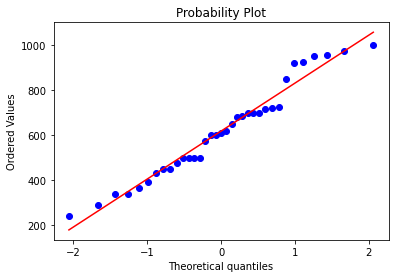

In [43]:
stats.probplot(peixes.loc[peixes["Species"] == "Bream", "Weight"], plot=plt);

<div id="q3"></div>

___
## Questão 3 - 5,0 pontos

<img src="./taking-photo.jpg" width=33% alt="Fonte: https://p2.piqsels.com/preview/267/181/187/flatlay-food-photography-taking-photo.jpg"> </img>

Uma startup está desenvolvendo um aplicativo baseado em visão computacional para estimar o peso de um peixe utilizando apenas uma imagem. O aplicativo já é capaz de estimar todas as 5 medidas (`Length1`, `Length2`, `Length3`, `Height` e `Width`), mas agora precisam encontrar uma maneira de estimar o peso do peixe.

Sua tarefa é encontrar a variável **(apenas uma)** que seja mais relevante para explicar o peso do peixe utilizando um modelo linear. **Vamos considerar apenas os peixes da espécie *Bream***.

<div id="q3a"></div>

**a) [0,75 PONTOS]** Construa 5 gráficos de dispersão para analisar a relação de cada uma das 5 medidas (`Length1`, `Length2`, `Length3`, `Height` e `Width`) com o peso do peixe da espécie *Bream*. Deve ser possível identificar o que cada gráfico representa sem consultar o código, ou seja, os gráficos devem possuir títulos, no mínimo.

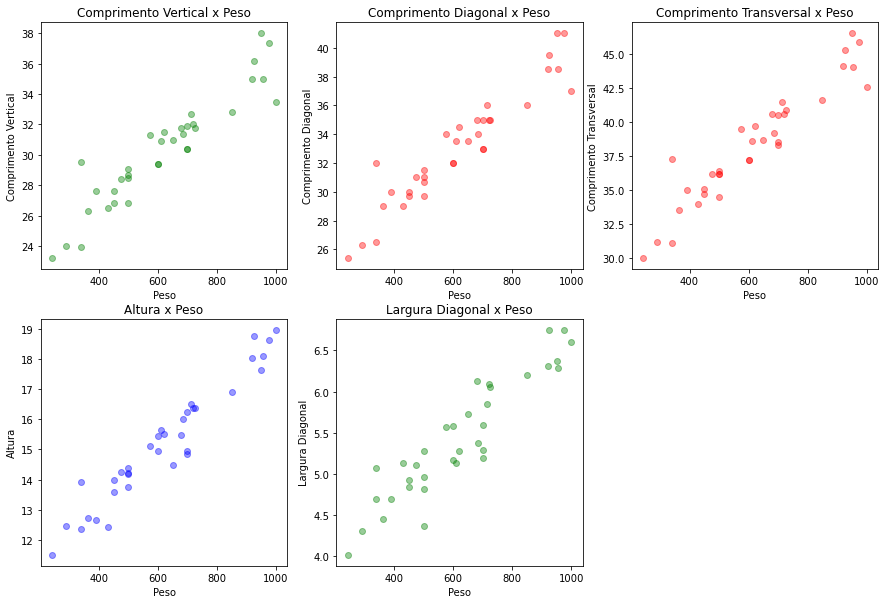

In [62]:
def plot_graph(y, ylabel):
    plt.scatter(peixes.loc[peixes["Species"] == "Bream", "Weight"], peixes.loc[peixes["Species"] == "Bream", y], color=random.choice(["r", "g", "b"]), alpha=0.4)
    plt.xlabel("Peso")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} x Peso")

plt.figure(figsize=(15, 10))

plt.subplot(231)
plot_graph("Length1", "Comprimento Vertical")
plt.subplot(232)
plot_graph("Length2", "Comprimento Diagonal")
plt.subplot(233)
plot_graph("Length3", "Comprimento Transversal")
plt.subplot(234)
plot_graph("Height", "Altura")
plt.subplot(235)
plot_graph("Width", "Largura Diagonal")
plt.show()

<div id="q3b"></div>

**b) [1,0 PONTO]** Ajuste um modelo linear **múltiplo** utilizando as 5 medidas para explicar a variável `Weight`. Neste item, **mostre** apenas os resultados desse ajuste.

In [63]:
x = peixes.loc[peixes["Species"] == "Bream", :].drop(["Species", "Weight"], axis=1)
y = peixes.loc[peixes["Species"] == "Bream", "Weight"]

X = sm.add_constant(x)

modelo = sm.OLS(y, X)    
resultados = modelo.fit()   

resultados.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     96.42
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           3.70e-17
Time:                        15:08:56   Log-Likelihood:                -185.96
No. Observations:                  35   AIC:                             383.9
Df Residuals:                      29   BIC:                             393.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -939.4375    162.617     -5.777      0.000   -1272.026    -606.849
Length1       16.1878     49.401      0.328      0.746     -84.849     117.225
Length2       17.9695     53.705      0.335      0.740     -91.869     127.808
Length3      -21.1881     42.259     -0.501      0.620    -107.617      65.241
Height        64.1981     17.841      3.598      0.001      27.709     100.687
Width         57.0522     42.139      1.354      0.186     -29.131     143.235
==============================================================================
Omnibus:                        7.792   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               10.614
Skew:                          -0.407   Prob(JB):                      0.00496
Kurtosis:                       5.572   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div id="q3c"></div>

**c) [2,0 PONTOS]** Baseado no resultado do item *b*, quais das afirmações a seguir são verdadeiras? Indique sua resposta no Blackboard.

- A variável `Length2` é mais relevante para explicar a variável `Weight` do que a variável `Height`; **`Falso`**
- Coeficientes negativos indicam que a variável não é relevante para explicar `Weight`; **`Falso`**
- O valor-p associado ao coeficiente de `Height` indica que essa variável é significativa para explicar `Weight` (considere nível de significância 0,5%); **`Verdadeiro`**
- De acordo com o resultado do teste Jarque-Bera podemos afirmar, com nível de significância de 1%, que a variável `Weight` segue uma distribuição normal; **`Falso`**
- De acordo com o resultado do teste Omnibus podemos afirmar, com nível de significância de 5%, que os resíduos não seguem uma distribuição normal. **`Verdadeiro`**

<div id="q3d"></div>

**d) [0,75 PONTOS]** Remova as variáveis menos relevantes até que reste apenas a mais relevante. Ajuste um novo modelo linear utilizando apenas essa variável. É suficiente se você apresentar apenas o resultado final do ajuste com a variável mais relevante.

In [70]:
x = peixes.loc[peixes["Species"] == "Bream", :].drop(["Species", "Weight", "Length1", "Length3", "Width", "Length2"], axis=1)
y = peixes.loc[peixes["Species"] == "Bream", "Weight"]

X = sm.add_constant(x)

modelo = sm.OLS(y, X)    
resultados = modelo.fit()   

resultados.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     440.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           1.16e-20
Time:                        15:15:53   Log-Likelihood:                -189.56
No. Observations:                  35   AIC:                             383.1
Df Residuals:                      33   BIC:                             386.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -941.5590     74.896    -12.571      0.000   -1093.937    -789.181
Height       102.7047      4.893     20.989      0.000      92.749     112.660
==============================================================================
Omnibus:                        1.780   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                0.784
Skew:                           0.246   Prob(JB):                        0.676
Kurtosis:                       3.544   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

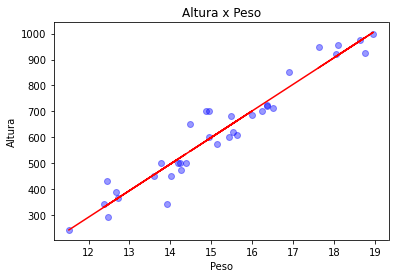

In [74]:
plt.scatter(x, y, color="b", alpha=0.4)
plt.plot(x, resultados.predict(), color="r");
plt.ylabel("Altura")
plt.xlabel("Peso")
plt.title("Altura x Peso")
plt.show()

<div id="q3e"></div>

**e) [0,5 PONTO]** Qual seria o peso, em gramas, de um peixe com as seguintes especificações utilizando o modelo ajustado no item *d*?

- `Length1`: 28
- `Length2`: 30
- `Length3`: 36
- `Height`: 16
- `Width`: 5

In [69]:
resultados.predict((1,16))

array([701.7166182])